![Mandel.png](./Mandel.png)

The Mandelbrot Set
===

The Mandelbrot set is a well known mathematical object. You can read about it on [Wikipedia](http://en.wikipedia.org/wiki/Mandelbrot_set). There are also "deep zooms" on YouTube exploring never before seen regions of the set.

We're going to explore how to plot it.

---

Below, we're defining the python function that will apply the Mandelbrot map:

$$f_{n+1} = f_n^2 + z,\qquad f_0 = 0, \qquad n\in\mathbb{N},z\in\mathbb{C}.$$

For a given complex number $z$, $z$ is a member of the Mandelbrot set if and only if the magnitude of $z$ stays bounded as $n\to\infty$.

---

Previously a numpy implementation provided the following cpu timings:

  N  | Wall Time | Machine 
----:|:---------:|:--------
  50 |    2.4 ms | s72-2
 500 |   97.1 ms | s72-2
5000 |   24.1 s  | s72-2


[0]: http://en.wikipedia.org/wiki/Mandelbrot_set

In [1]:
from timeit import default_timer as timer
import pylab as plt
import numpy as np
from numba import jit
from plt_style import *

@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
    return 255

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width  = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[x, y] = color
    return image


In [2]:
M = 5000
xlims = np.r_[-2,1]
ylims = np.r_[-1,1]
x = np.linspace(*xlims,M)
y = np.linspace(*ylims,M)
X,Y = np.meshgrid(x,y,indexing='ij')
image = np.zeros(X.shape, dtype=np.uint8)

In [3]:
s = timer()
create_fractal(*xlims,*ylims, image, 255)
e = timer()
print(e - s,image.shape)


8.40899271890521 (5000, 5000)


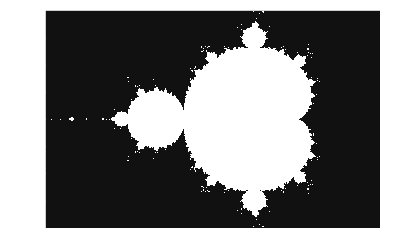

In [4]:
plt.contourf(X,Y,image,[254,255],colors='w')